# Iris Dataset

In [1]:
%matplotlib inline

import radtree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, feature_selection
from sklearn import datasets
import numpy as np
random_state = 42
np.random.seed(random_state)

In [2]:
X, y = datasets.load_iris(True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

# Simple Decision Tree

In [3]:
dtree = DecisionTreeClassifier(random_state=random_state)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Visualize test data

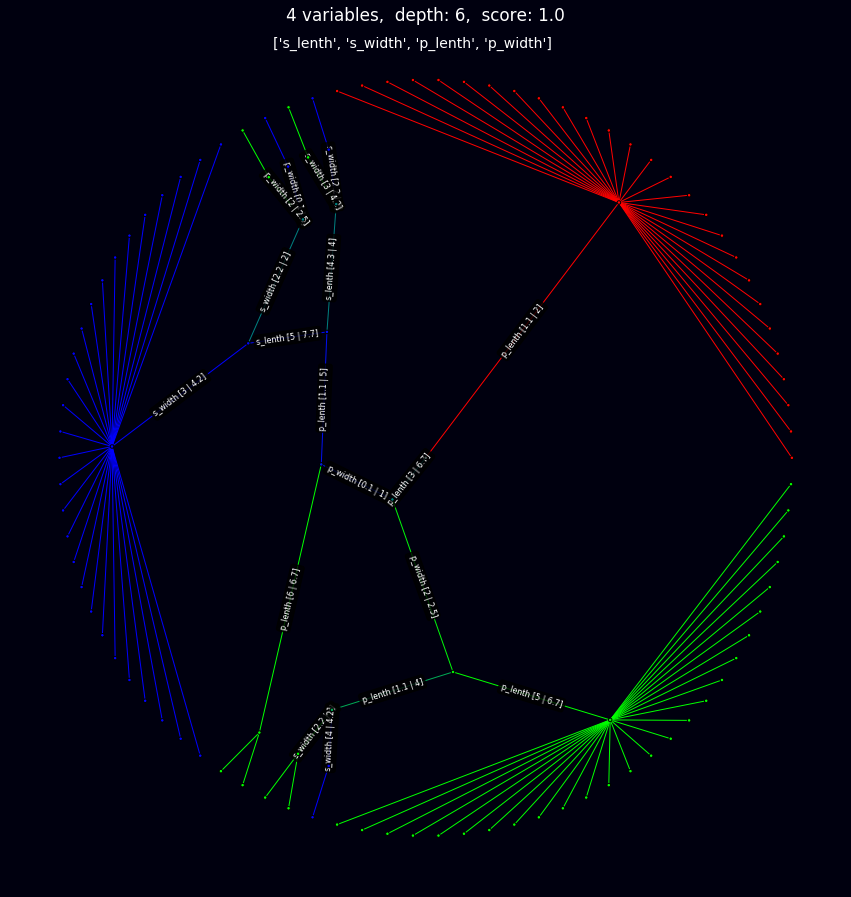

In [4]:
radtree.plot_radial(dtree, X=X_train,Y=y_train, edges_labels=['s_lenth','s_width', 'p_lenth', 'p_width'],
                    random_state=random_state)

- Setosa (red)
- Versicolor (blue)
- Virginica (green)

We can see that the **petal length** is a strong feature to separate the **Setosa Iris** in **red** from the other 2 species.   
For comparison, notice the pair plot :   
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/800px-Iris_dataset_scatterplot.svg.png" width="400">

On the other branch, the structure already shows that the tree is overfitted.   
It defines too precisely all the features so it finds each specific sample.  
This is shown by the small branches forking up and down.   

## Visualize train data

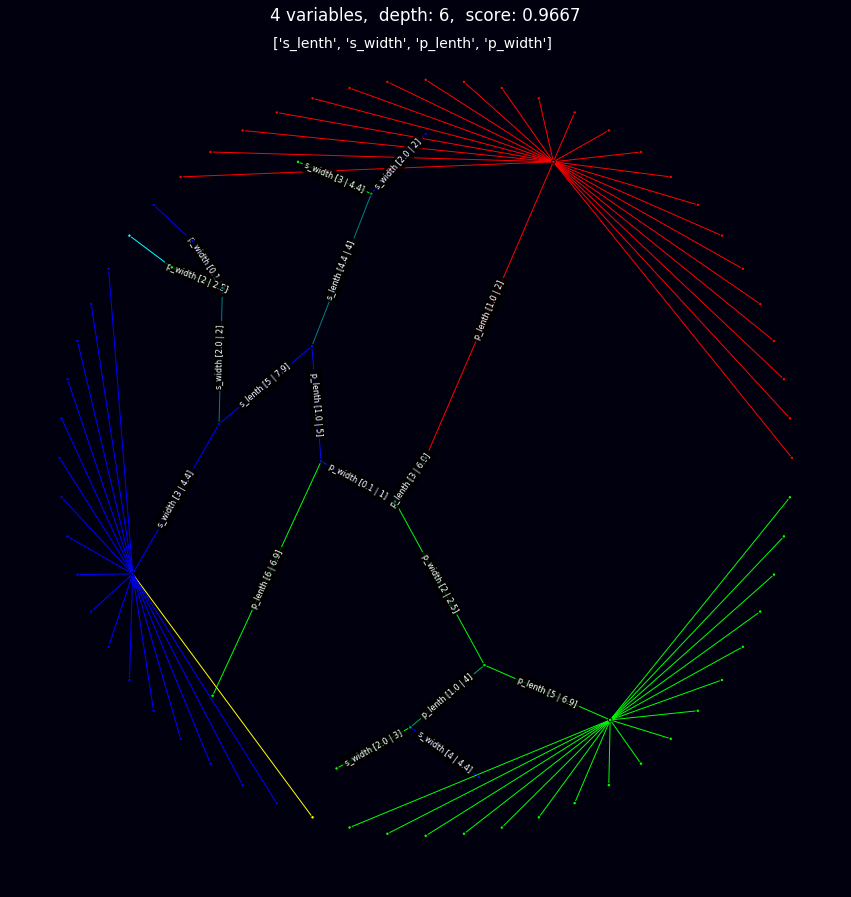

In [5]:
radtree.plot_radial(dtree, X=X_test,Y=y_test, 
                    edges_labels=['s_lenth','s_width', 'p_lenth', 'p_width'],
                    random_state=random_state)

The test data confirms this overfitting misclassified 2 samples.
- A **Virginica Iris** that should be **green** and is shown in **yellow**.
- A **Versicolor** that should be **blue** becames **cyan** as it's mistaken by a **Virginica**.

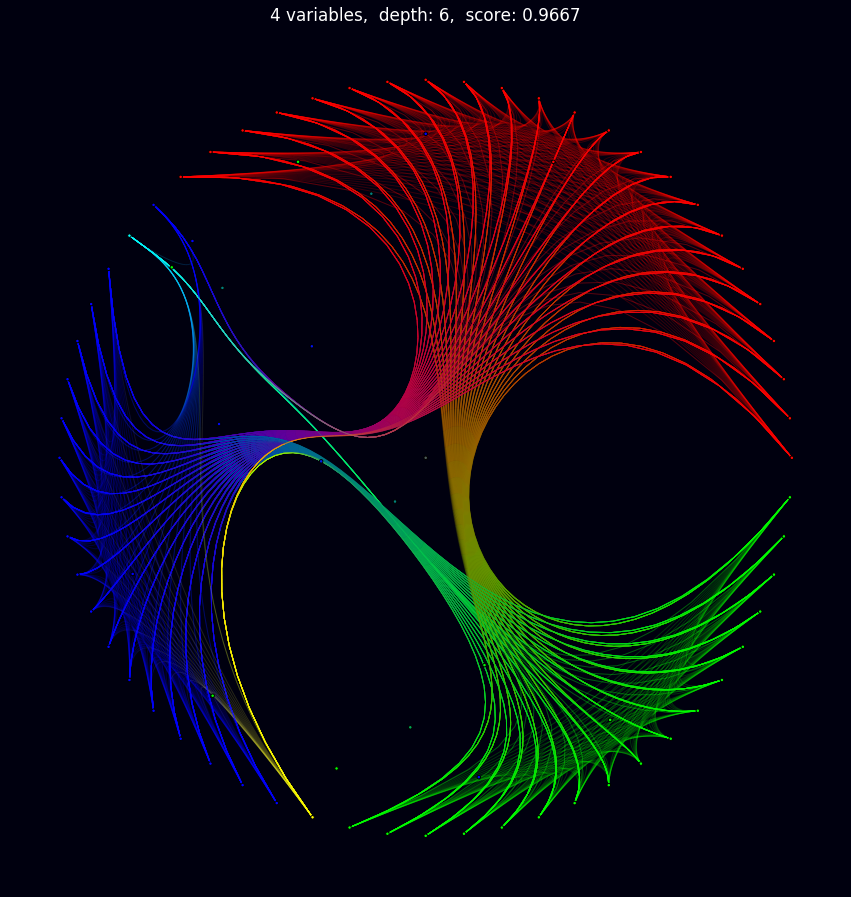

In [6]:
radtree.plot_radial(dtree, X=X_test,Y=y_test, 
                    smooth_d=8,
                    random_state=random_state,
                    l_alpha=.2, l_width=1
                   )

With a more intuitive approach you can see how close the data is related, and how distant the misclassified samples are from their branches.

# Feature Selection

In [7]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=random_state)
dtree_rfe = feature_selection.RFECV(DecisionTreeClassifier(random_state=random_state), step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X_train, y_train)
sel_features = dtree_rfe.get_support()
dtree = DecisionTreeClassifier(random_state=random_state)
dtree.fit(X_train[:,sel_features], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [8]:
edges_labels = ['s_lenth','s_width', 'p_lenth', 'p_width']
edges_labels = [edges_labels[i] for i, sel in enumerate(sel_features) if sel]
edges_labels

['s_width', 'p_lenth', 'p_width']

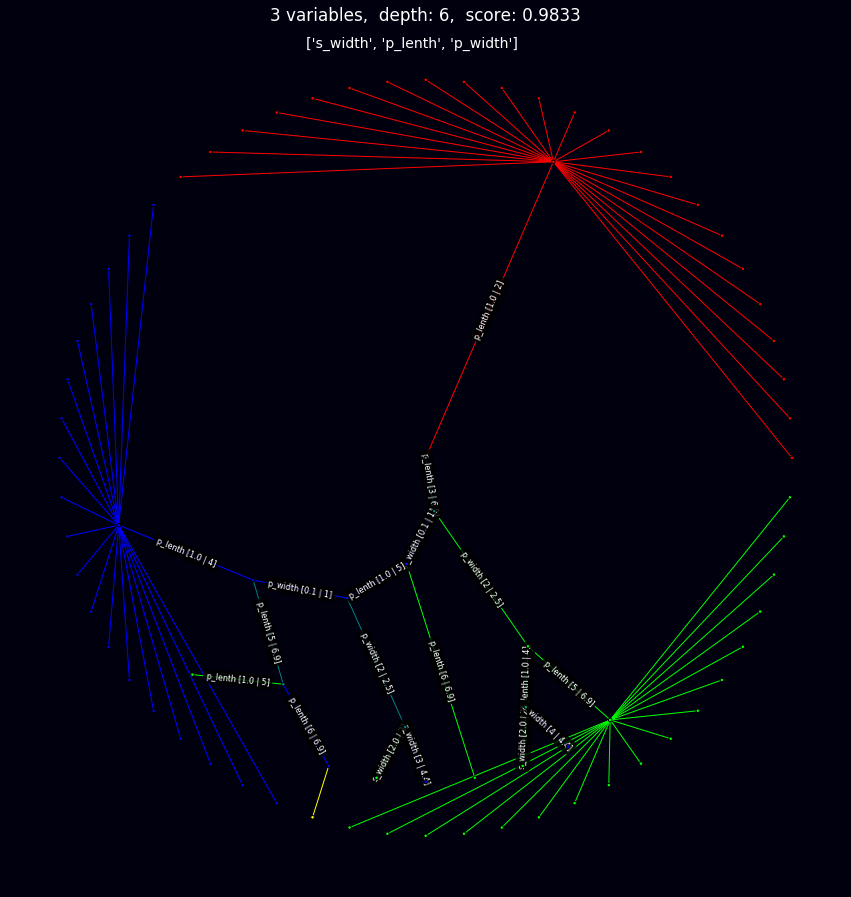

In [9]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, edges_labels=edges_labels,
                    random_state=random_state)

The feature selection discarded the **sepal length**. Wich can make sense sice **Virginica** and **Versicolor** sepal lenghts overlap.   
And the tree looks a bit cleaner. But it's still branching, and still overfitting.   
As the **Iris Dataset** is quite small, it's easy for the tree to overfit.

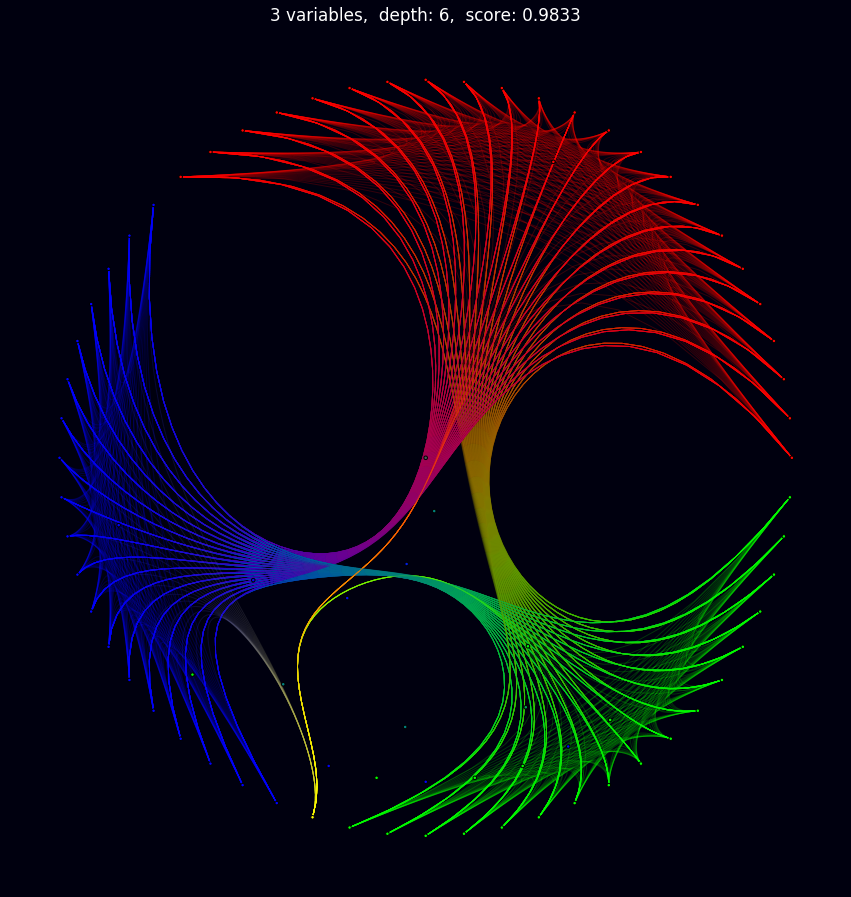

In [10]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, smooth_d=8, l_alpha=.2, l_width=1, random_state=random_state)

# Grid Search CV

In [11]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,3,4,5,6,None],
              'random_state': [random_state]
             }
dtree_gscv = model_selection.GridSearchCV(DecisionTreeClassifier(random_state=random_state), param_grid=param_grid, scoring = 'accuracy', cv = cv_split)
dtree_gscv.fit(X_train[:,sel_features], y_train)
dtree = dtree_gscv.best_estimator_
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'random_state': 42}

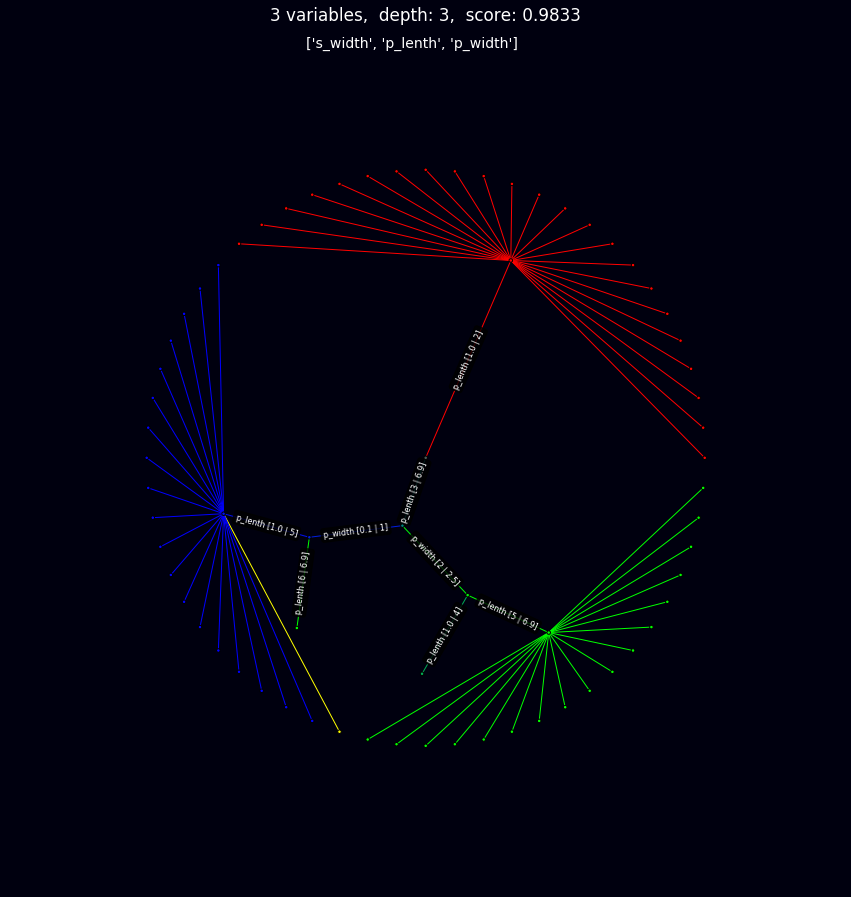

In [12]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, edges_labels=edges_labels, 
                    random_state=random_state)

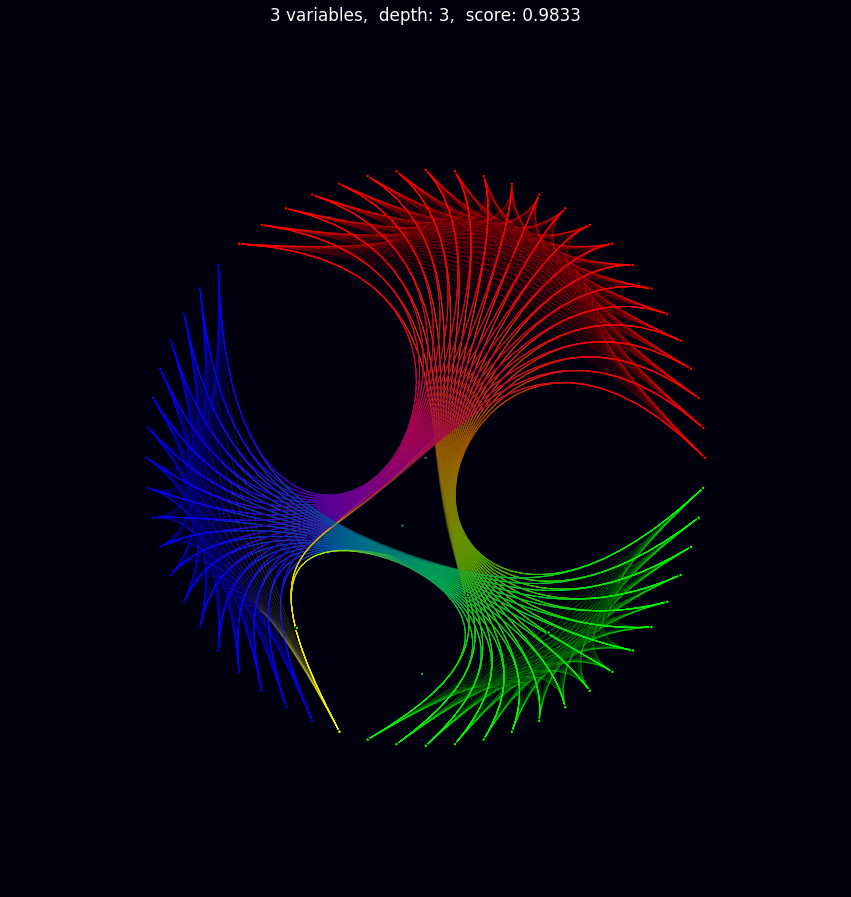

In [13]:
radtree.plot_radial(dtree, X=X_test[:,sel_features], Y=y_test, smooth_d=8, l_alpha=.2, l_width=1, random_state=random_state)

# Final Tree

Performing a grid search on some parameters, we get a better cross validation with **max_depth=3**.   
This gives us a much simpler and more reasonable tree.   
One **Virginica** sample still gets misclassified, but the tree generalizes much better.